In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('convocatorias.csv')

dataset.columns = [x.replace(' ','_').lower() for x in list(dataset.columns)]

# Los datos recolectados inician en Enero de 2019 y acaban en Febrero de 2025

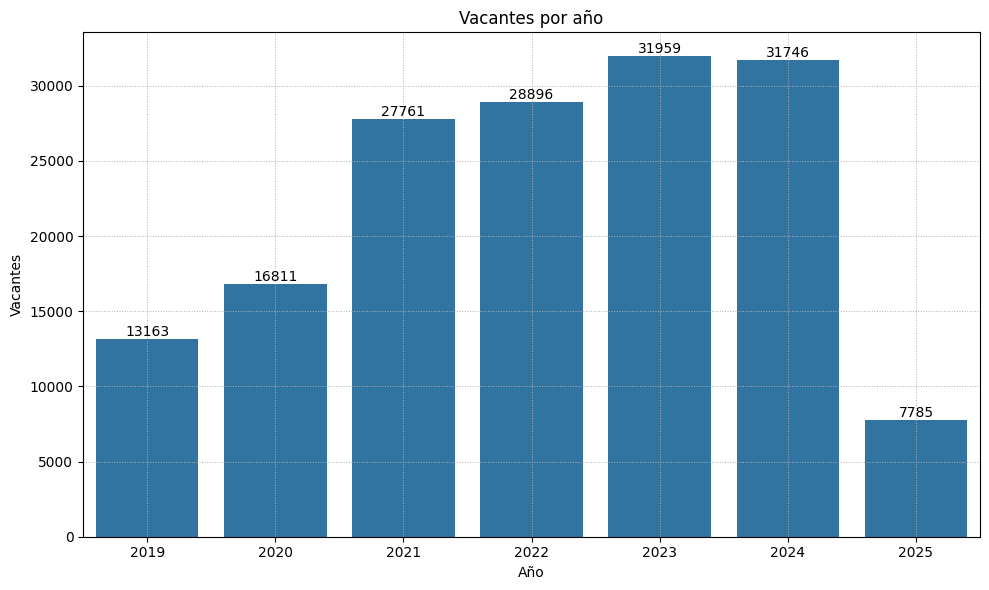

In [ ]:
años = dataset['año'].unique()
vacantes_año = {}
for año in años:
  vacantes_año[año]= dataset[dataset['año'] == año]['cantidad_vacantes'].sum()

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=vacantes_año,
    x = vacantes_año.keys(),
    y = vacantes_año.values()
)
ax.bar_label(ax.containers[0])

plt.title('Vacantes por año')
plt.xlabel('Año')
plt.ylabel('Vacantes')

plt.grid(
    linestyle='dotted',
    linewidth=0.7
)

plt.tight_layout()
plt.show()

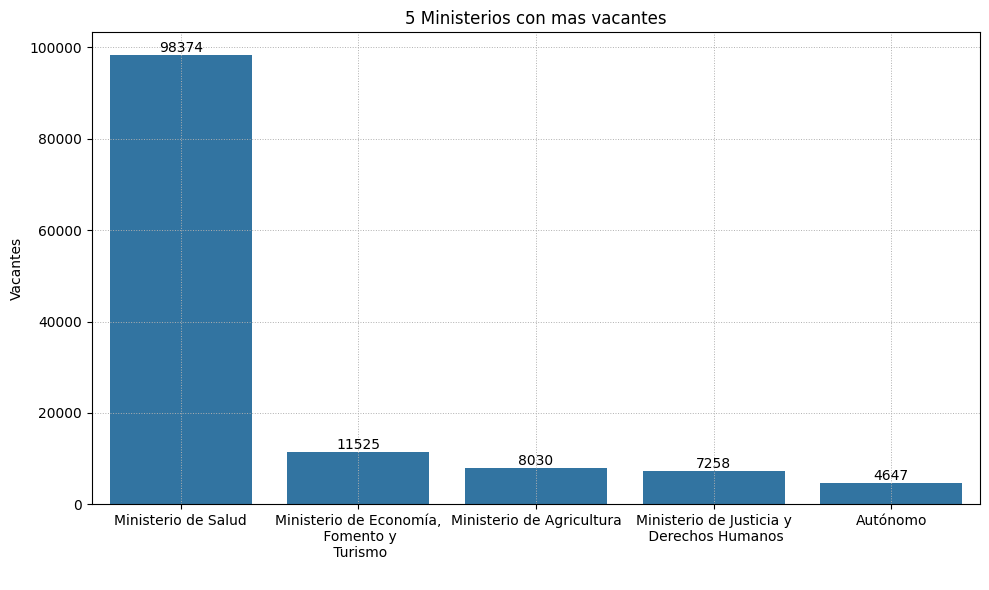

In [ ]:
vacantes_ministerio = dataset.groupby(
    ['ministerio']
)[['cantidad_vacantes']].sum().sort_values(by='cantidad_vacantes',ascending=False)[:5]

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=vacantes_ministerio,
    x = [ i.replace(',',',\n').replace('y','y\n') for i in list(vacantes_ministerio.index)],
    y = vacantes_ministerio['cantidad_vacantes']
)
ax.bar_label(ax.containers[0])
plt.title('5 Ministerios con mas vacantes')
plt.xlabel(' ')
plt.ylabel('Vacantes')
plt.grid(
    linestyle='dotted',
    linewidth=0.7
)

plt.tight_layout()
plt.show()

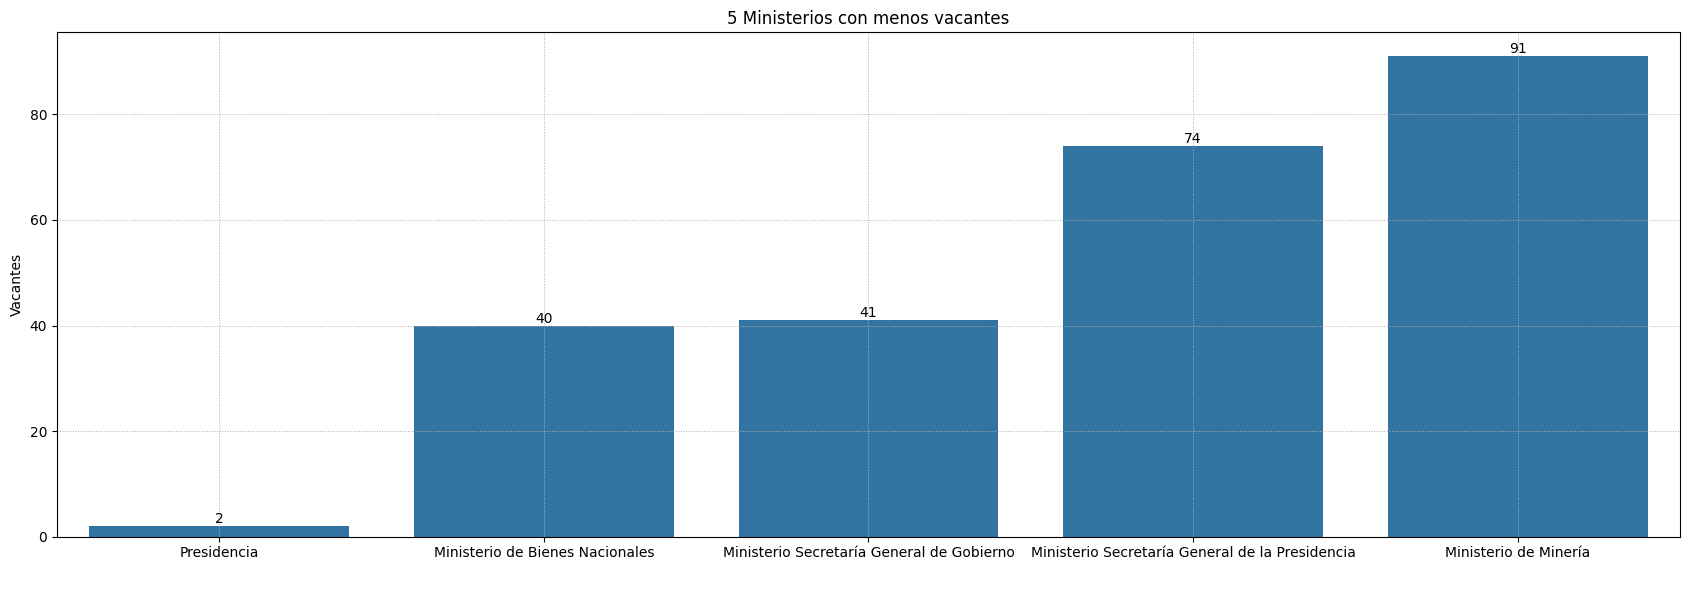

In [ ]:
vacantes_ministerio = dataset.groupby(
    ['ministerio']
)[['cantidad_vacantes']].sum().sort_values(by='cantidad_vacantes',ascending=True)[:5]

plt.figure(figsize=(17,6))

ax = sns.barplot(
    data=vacantes_ministerio,
    x = [ i.replace(',',',\n').replace('y','y\n') for i in list(vacantes_ministerio.index)],
    y = vacantes_ministerio['cantidad_vacantes']
)
ax.bar_label(ax.containers[0])

plt.title('5 Ministerios con menos vacantes')
plt.xlabel(' ')
plt.ylabel('Vacantes')
plt.grid(
    linestyle='dotted',
    linewidth=0.7
)

plt.tight_layout()
plt.show()

#### Porcentaje de vacantes por Ministerio

In [ ]:
porcentaje_ministerios = {}
for ministerio in dataset['ministerio'].unique():
  n_ministerio = dataset[dataset['ministerio'] == ministerio]['cantidad_vacantes'].sum()
  n_total = dataset['cantidad_vacantes'].sum()
  porcentaje_ministerios[ministerio] = round((n_ministerio * 100)/n_total,3)

print('Porcentaje de vacantes por Ministerio\n')
for key,value in porcentaje_ministerios.items():
  print(f'{key}: {value}%')

Porcentaje de vacantes por Ministerio
Ministerio del Deporte: 2.36%
Ministerio de Salud: 62.214%
Autónomo: 2.939%
Ministerio del Trabajo y Previsión Social: 1.023%
Ministerio del Interior: 2.095%
Ministerio de Economía, Fomento y Turismo: 7.289%
Ministerio de Agricultura: 5.078%
Ministerio de Educación: 2.197%
Ministerio de Justicia y Derechos Humanos: 4.59%
Ministerio de Hacienda: 0.839%
Ministerio de Desarrollo Social y Familia: 2.664%
Ministerio de Transportes y Telecomunicaciones: 0.538%
Ministerio del Medio Ambiente: 0.299%
Ministerio de Vivienda y Urbanismo: 1.399%
Ministerio de Relaciones Exteriores: 0.312%
Ministerio de Obras Públicas: 1.482%
Ministerio de Seguridad Pública: 0.633%
Ministerio de las Culturas, las Artes y el Patrimonio: 0.607%
Ministerio de Defensa Nacional: 0.764%
Ministerio de Energía: 0.261%
Ministerio de la Mujer y la Equidad de Género: 0.141%
Ministerio de Bienes Nacionales: 0.025%
Ministerio Secretaría General de Gobierno: 0.026%
Ministerio de Minería: 0.0

#### Porcentaje de postulaciones aceptadas por ministerio

In [ ]:
n_postulaciones = {}

for ministerio in dataset['ministerio'].unique():
  n_post = dataset[dataset['ministerio'] == ministerio]['número_postulaciones'].sum()
  n_vac = dataset[dataset['ministerio'] == ministerio]['cantidad_vacantes'].sum()

  n_postulaciones[ministerio] = round((n_vac * 100)/n_post,3)

print('Porcentaje de postulaciones aceptadas por Ministerio')
for key,value in n_postulaciones.items():
  print(f'{key}: {value}%')

Porcentaje de postulaciones por Ministerio
Ministerio del Deporte: 2.562%
Ministerio de Salud: 3.327%
Autónomo: 1.569%
Ministerio del Trabajo y Previsión Social: 0.837%
Ministerio del Interior: 1.415%
Ministerio de Economía, Fomento y Turismo: 1.952%
Ministerio de Agricultura: 5.227%
Ministerio de Educación: 0.645%
Ministerio de Justicia y Derechos Humanos: 1.369%
Ministerio de Hacienda: 0.591%
Ministerio de Desarrollo Social y Familia: 0.733%
Ministerio de Transportes y Telecomunicaciones: 0.674%
Ministerio del Medio Ambiente: 0.568%
Ministerio de Vivienda y Urbanismo: 1.028%
Ministerio de Relaciones Exteriores: 0.695%
Ministerio de Obras Públicas: 0.857%
Ministerio de Seguridad Pública: 1.713%
Ministerio de las Culturas, las Artes y el Patrimonio: 0.595%
Ministerio de Defensa Nacional: 1.585%
Ministerio de Energía: 0.64%
Ministerio de la Mujer y la Equidad de Género: 0.345%
Ministerio de Bienes Nacionales: 0.531%
Ministerio Secretaría General de Gobierno: 0.38%
Ministerio de Minería:

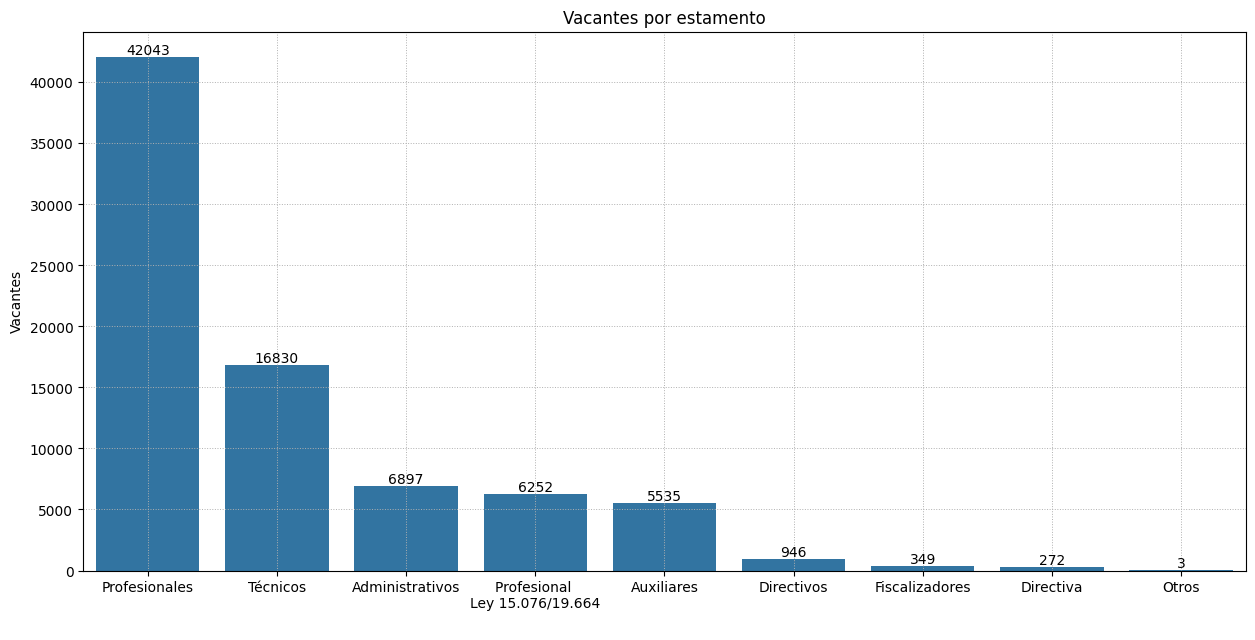

In [ ]:
n_estamento = dataset.groupby('estamento')[['cantidad_vacantes']].count().sort_values(by='cantidad_vacantes',ascending=False)

plt.figure(figsize=(15,7))

ax = sns.barplot(
    data=n_estamento,
    x=[ i.replace('Ley','\nLey') for i in list(n_estamento.index)],
    y='cantidad_vacantes'
)
ax.bar_label(ax.containers[0])

plt.title('Vacantes por estamento')
plt.xlabel(' ')
plt.ylabel('Vacantes')
plt.grid(
    linestyle='dotted',
    linewidth=0.7
)

plt.show()

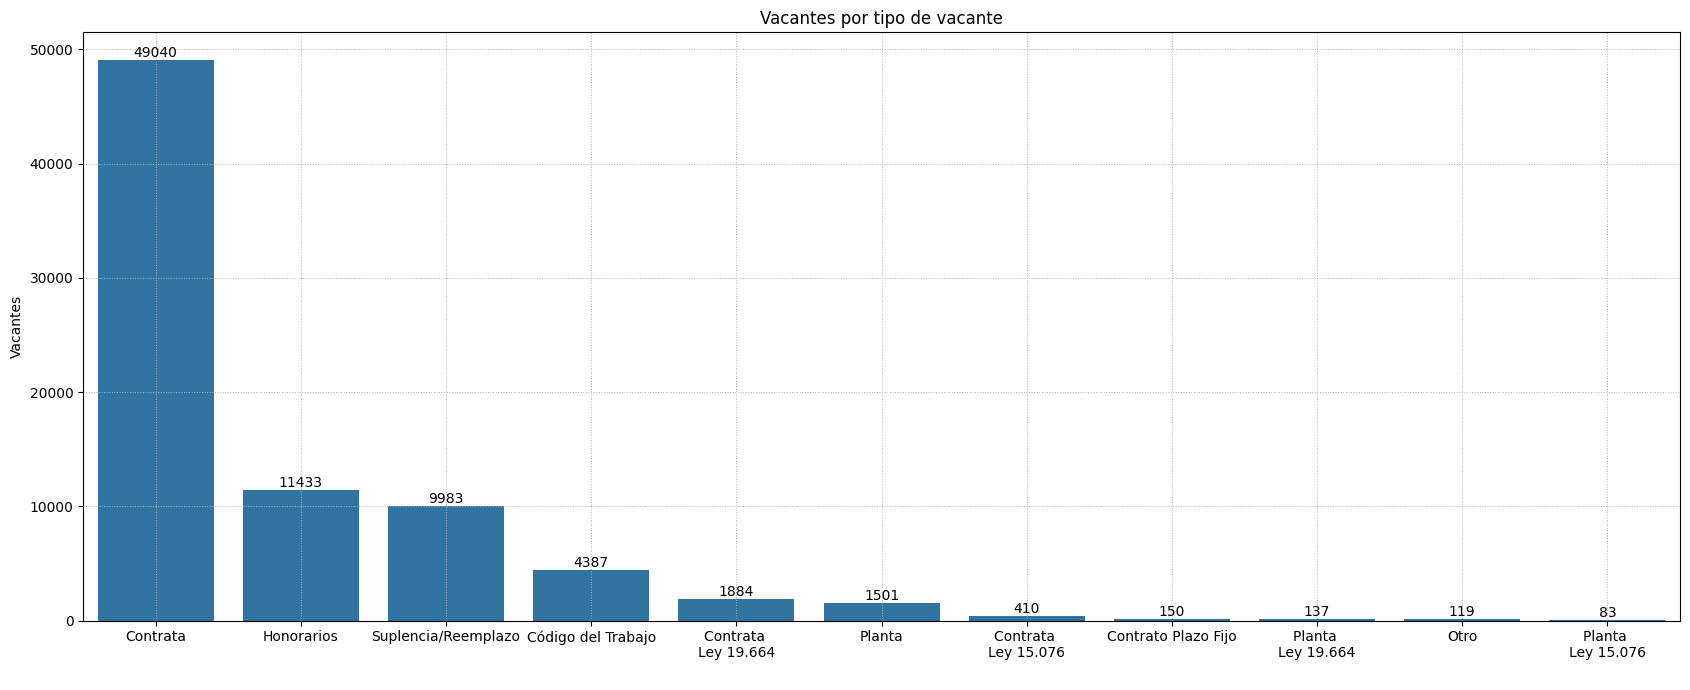

In [ ]:
n_tipo_vacante = dataset.groupby('tipo_de_vacante')[['cantidad_vacantes']].count().sort_values(by='cantidad_vacantes',ascending=False)

plt.figure(figsize=(17,7))
ax = sns.barplot(
    data=n_tipo_vacante,
    x=[i.replace('Ley','\nLey') for i in list(n_tipo_vacante.index)],
    y='cantidad_vacantes'
)
ax.bar_label(ax.containers[0])

plt.title('Vacantes por tipo de vacante')
plt.xlabel(' ')
plt.ylabel('Vacantes')
plt.grid(
    linestyle='dotted',
    linewidth=0.7
)
plt.tight_layout()
plt.show()

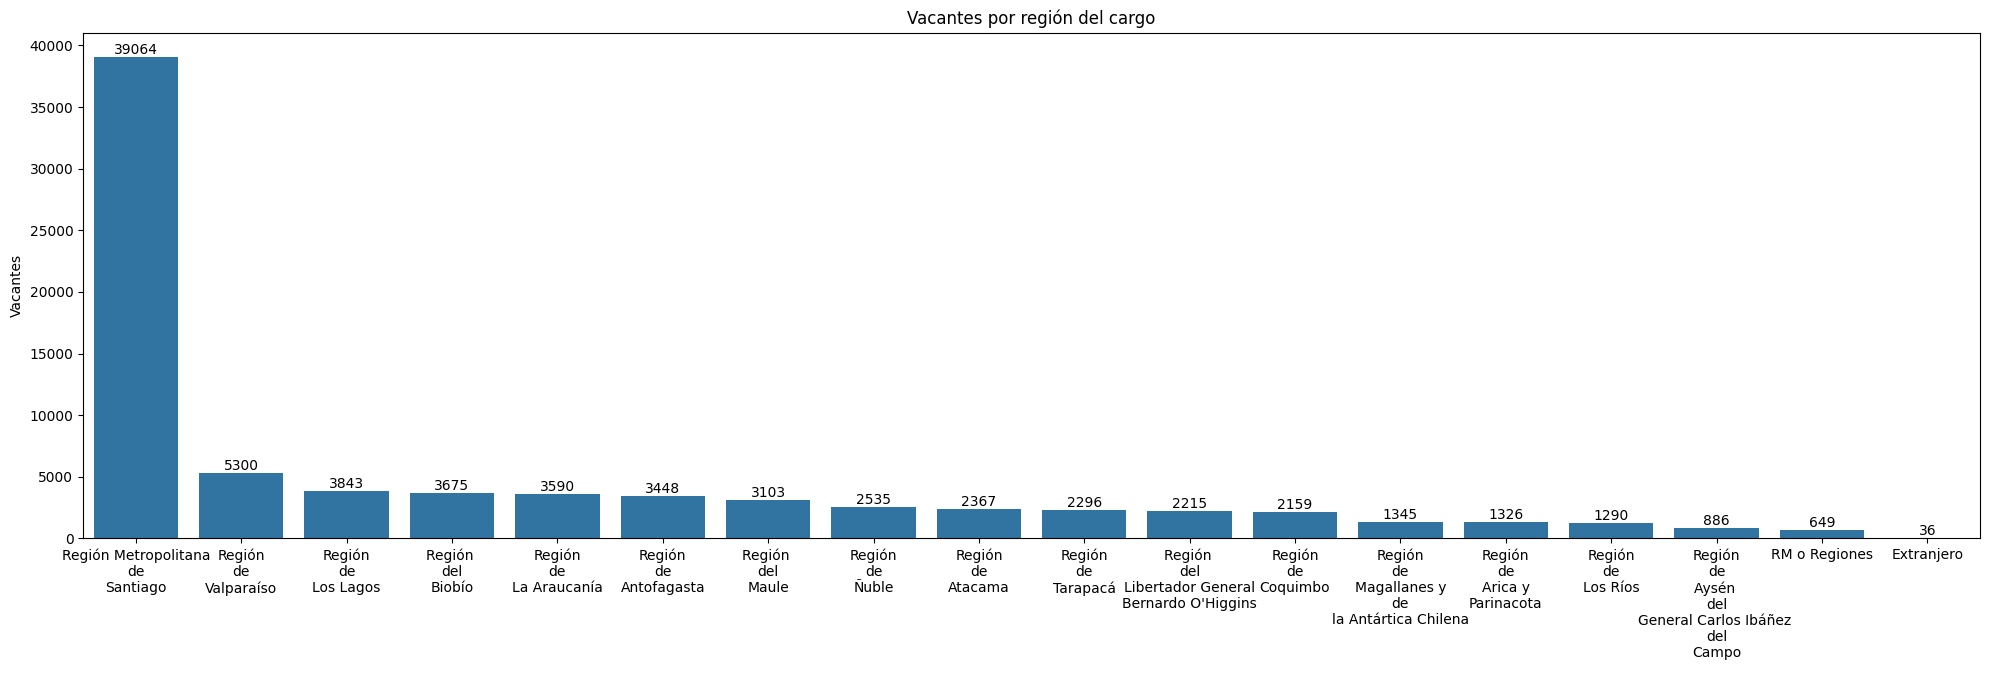

In [ ]:
n_vacantes_region = dataset.groupby('región_del_cargo')[['cantidad_vacantes']].count().sort_values(by='cantidad_vacantes',ascending=False)

plt.figure(figsize=(20,7))
sns.barplot(
    data = n_vacantes_region,
    x = [i.replace('de ','\nde\n').replace('del ','\ndel\n').replace('l B','l\nB').replace(' y ','y\n') for i in list(n_vacantes_region.index)],
    y = 'cantidad_vacantes'
)
plt.title('Vacantes por región del cargo')
plt.xlabel(' ')
plt.ylabel('Vacantes')

plt.tight_layout()
plt.show()

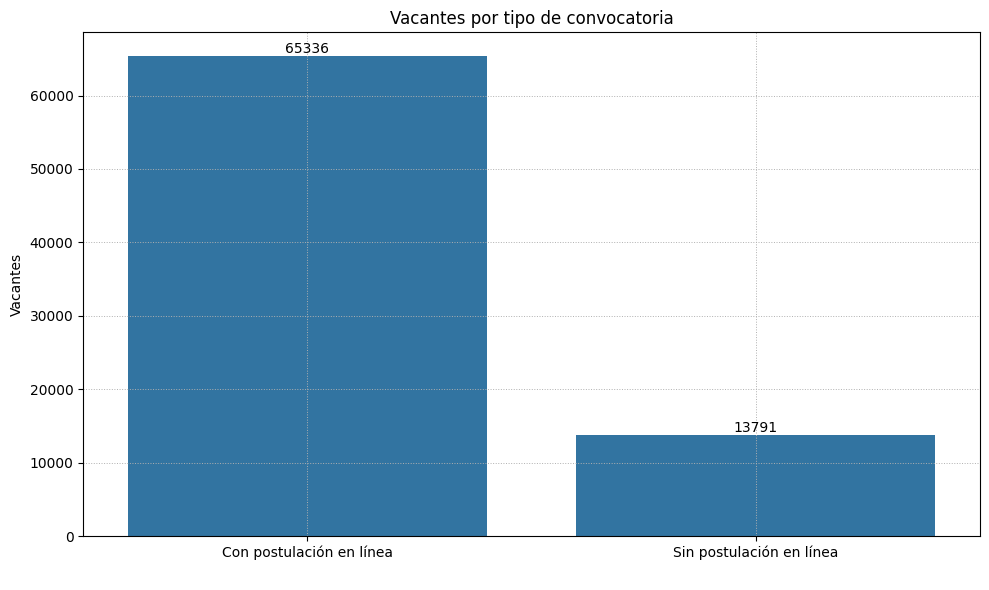

In [ ]:
tipo_convocatoria = dataset.groupby('tipo_convocatoria')[['cantidad_vacantes']].count().sort_values(by='cantidad_vacantes',ascending=False)

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=tipo_convocatoria,
    x=tipo_convocatoria.index,
    y='cantidad_vacantes'
)
ax.bar_label(ax.containers[0])

plt.title('Vacantes por tipo de convocatoria')
plt.xlabel(' ')
plt.ylabel('Vacantes')
plt.grid(
    linestyle='dotted',
    linewidth=0.7
)
plt.tight_layout()
plt.show()

In [ ]:
meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']

postulaciones_2024 = dataset[dataset['año'] == 2024].groupby('mes')[['cantidad_vacantes']].count().sort_index(level=meses)

postulaciones_2024.index = pd.CategoricalIndex(postulaciones_2024.index, categories=meses, ordered=True)

postulaciones_2024 = postulaciones_2024.sort_index()

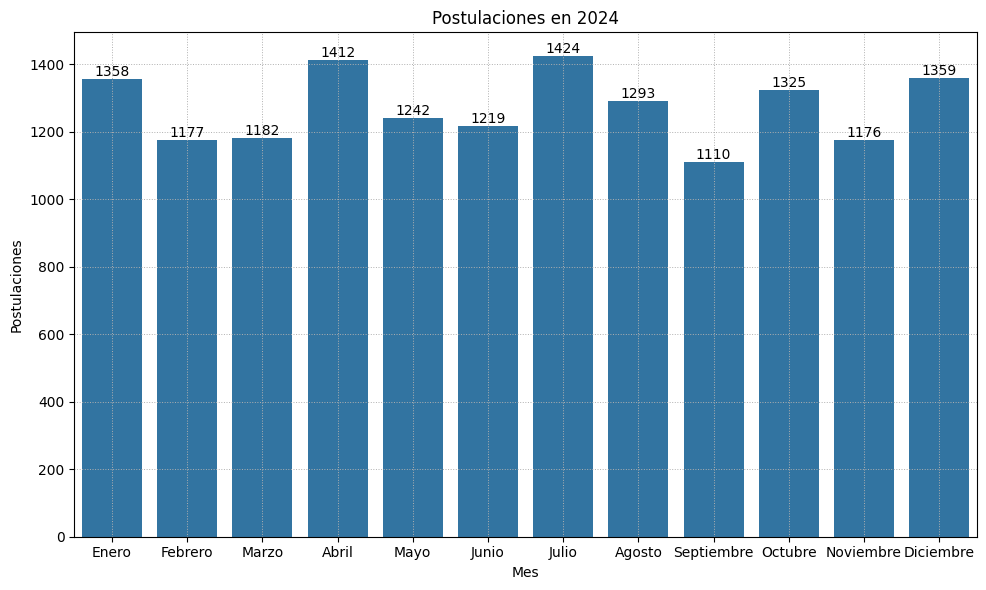

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=postulaciones_2024,
    x=postulaciones_2024.index,
    y='cantidad_vacantes'
)
ax.bar_label(ax.containers[0])
plt.title('Postulaciones en 2024')
plt.xlabel('Mes')
plt.ylabel('Postulaciones')
plt.grid(
    linestyle='dotted',
    linewidth=0.7
)

plt.tight_layout()
plt.show()

In [ ]:
postulaciones_2025 = dataset[dataset['año'] == 2025].groupby('mes')[['cantidad_vacantes']].count()
postulaciones_2025.index = pd.CategoricalIndex(postulaciones_2025.index,categories=meses,ordered=True)
postulaciones_2025 = postulaciones_2025.sort_index()

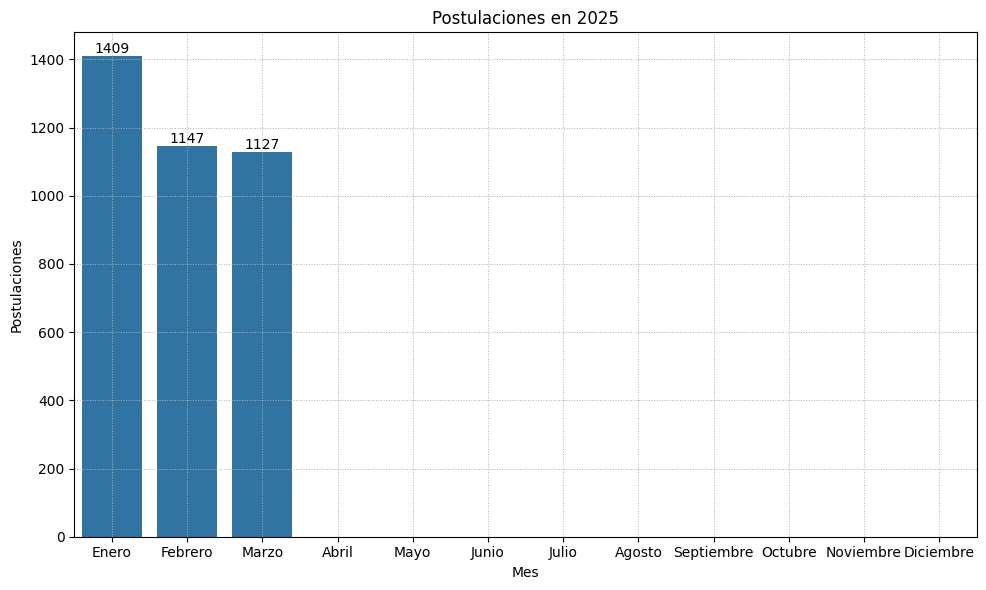

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=postulaciones_2025,
    x=postulaciones_2025.index,
    y='cantidad_vacantes'
)
ax.bar_label(ax.containers[0])
plt.title('Postulaciones en 2025')
plt.xlabel('Mes')
plt.ylabel('Postulaciones')
plt.grid(
    linestyle='dotted',
    linewidth=0.7
)

plt.tight_layout()
plt.show()